In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
# Function to compute likelihood
def likelihood(theta, measurements):
    predicted_values = np.sin(theta * time_points)
    likelihoods = norm.pdf(measurements, loc=predicted_values, scale=sigma_n)
    return np.prod(likelihoods)  # Compute product of likelihoods

# Function to calculate posterior
def posterior(measurements):
    likelihoods = np.array([likelihood(theta, measurements) for theta in theta_range])
    posterior_unnormalized = likelihoods * prior
    return posterior_unnormalized / posterior_unnormalized.sum()  # Normalize

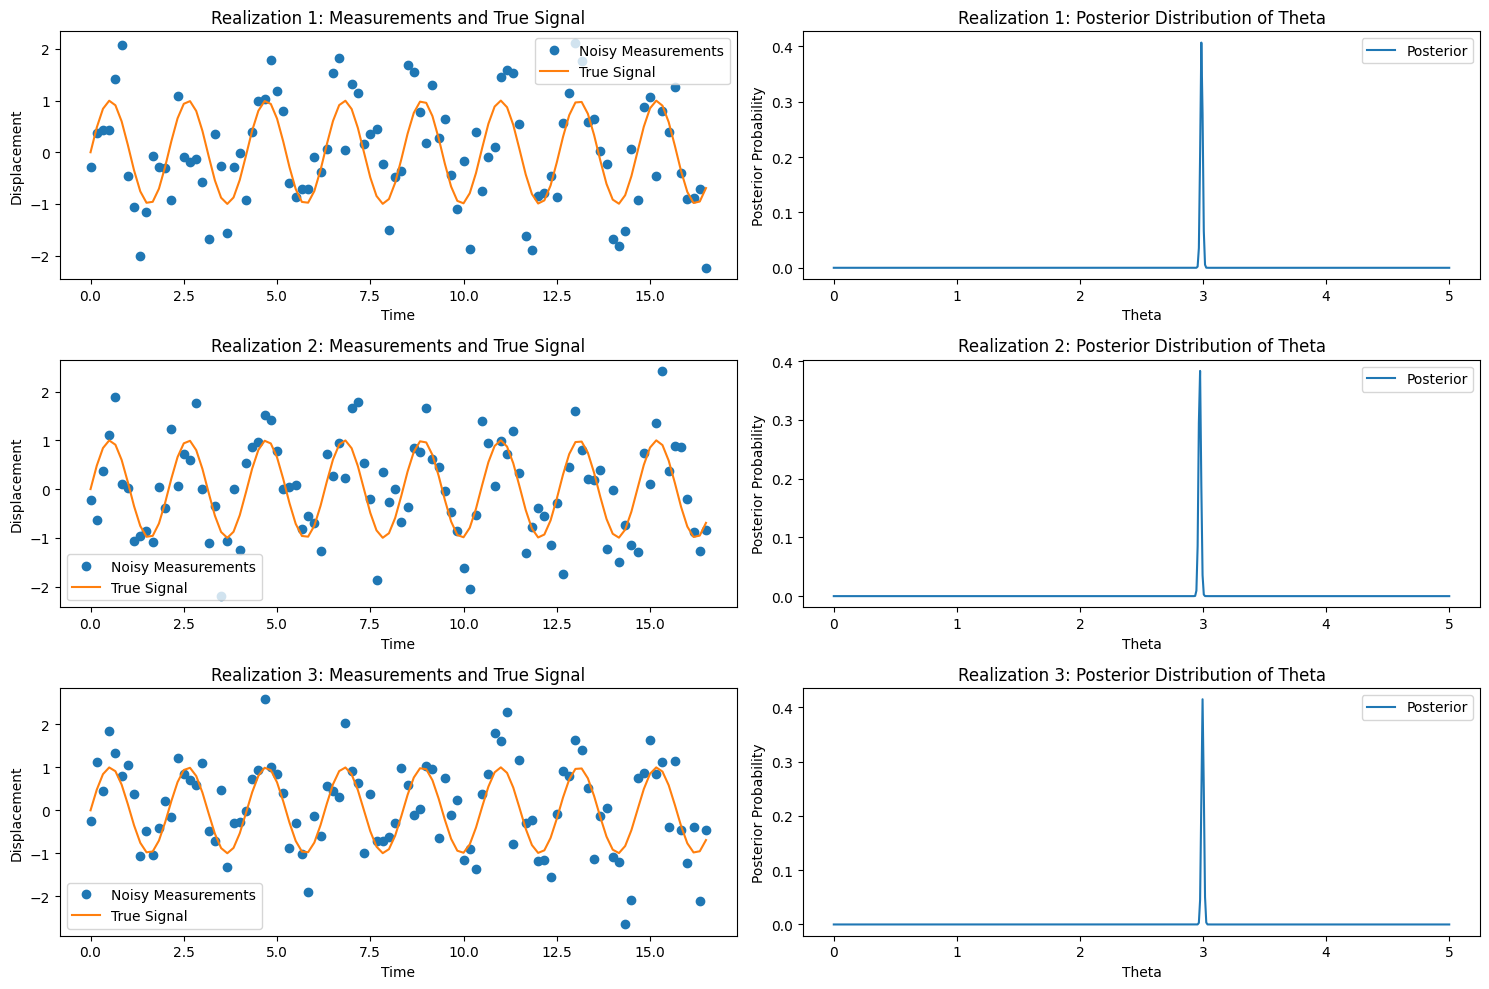

In [9]:
# Parameters
theta_true = 3  # True pendulum constant
K = 100  # Number of measurements
sigma_n2 = 0.5  # Noise variance
sigma_n = np.sqrt(sigma_n2)  # Standard deviation of noise
theta_range = np.linspace(0, 5, 500)  # Range for theta values for posterior

# Define Gaussian prior for part (c) with mean 2 and variance 0.2
prior_mean = 2
prior_variance = 0.2
prior_std = np.sqrt(prior_variance)
prior = norm.pdf(theta_range, loc=prior_mean, scale=prior_std)
prior /= prior.sum()  # Normalize the prior so it integrates to 1

# Sampling interval based on Nyquist frequency
delta_t = 1 / (2 * theta_true)
time_points = np.arange(K) * delta_t  # Time points

# Run simulation and plot results for 3 realizations
plt.figure(figsize=(15, 10))
for i in range(3):
    # Generate noisy measurements
    true_signal = np.sin(theta_true * time_points)
    noise = np.random.normal(0, sigma_n, K)
    measurements = true_signal + noise

    # Calculate posterior
    posterior_distribution = posterior(measurements)

    # Plot measurements
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(time_points, measurements, 'o', label="Noisy Measurements")
    plt.plot(time_points, true_signal, label="True Signal")
    plt.xlabel("Time")
    plt.ylabel("Displacement")
    plt.legend()
    plt.title(f"Realization {i+1}: Measurements and True Signal")

    # Plot posterior
    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(theta_range, posterior_distribution, label="Posterior")
    plt.xlabel("Theta")
    plt.ylabel("Posterior Probability")
    plt.legend()
    plt.title(f"Realization {i+1}: Posterior Distribution of Theta")

plt.tight_layout()
plt.show()